# PREAPARED BY DIVYA KUMARI

## TASK #2: PREDICTION USING UNSUPERVISED LEARNING

### OBJECTIVE
- From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Importing libraries

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
%matplotlib inline

In [2]:
#loading the dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
#showing the targets provided
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

There are three categories namely: setosa, versicolor, virginica in which the given datset will be grouped.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


The dataset contains 150 rows and 4 columns. The features in this dataframe are the indpendent variables which would be mapped to the categories they belong.

### Optimum number of clusters using elbow method

The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

In [5]:
#Finding optimum number of clusters using elbow method.

x = data.iloc[:, [0, 1, 2, 3]].values
wcss = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeanModel.fit(data)
    wcss.append(kmeanModel.inertia_)

Above code can easily run K-Means for a range of clusters using a for loop and collecting the distortions into a list.

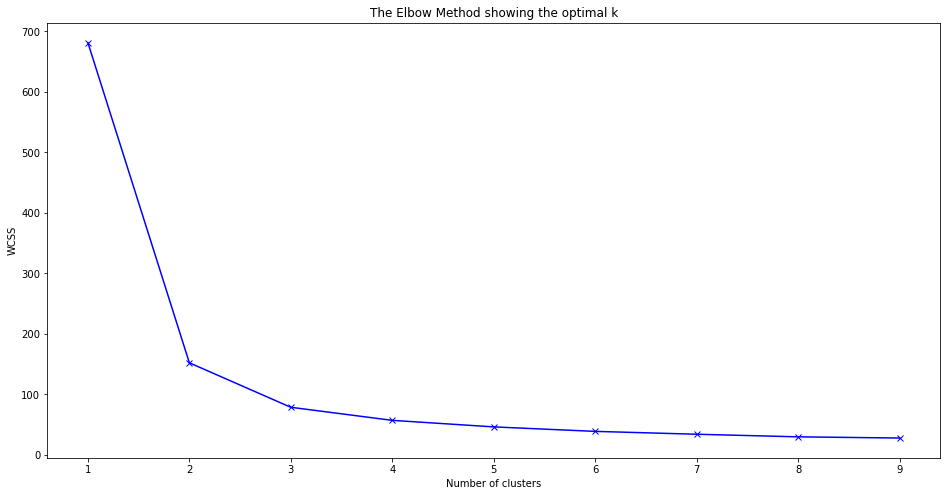

In [6]:
#Plotting the sum of squared error against clusters

plt.figure(figsize = (16,8))
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### We can observe that the “elbow” is the number 3 which is optimal for this case. So we will run a K-Means using as n_clusters the number 3.

### Model Training

In [7]:
# Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

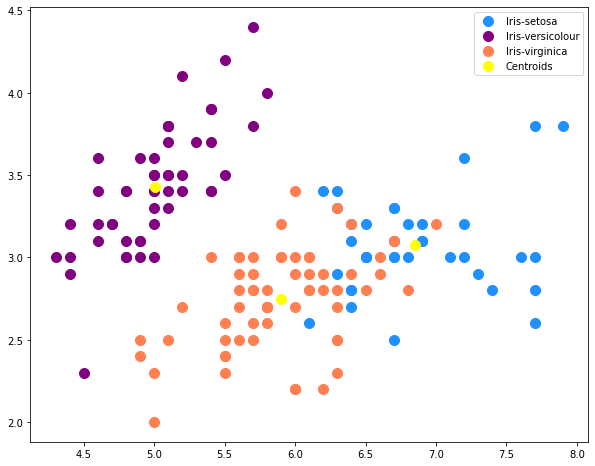

In [13]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'dodgerblue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'coral', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

The graph shows visualisation of the clusters created by the k-means prediction.

### K-means vs Actual

Text(0.5, 1.0, 'K_Means')

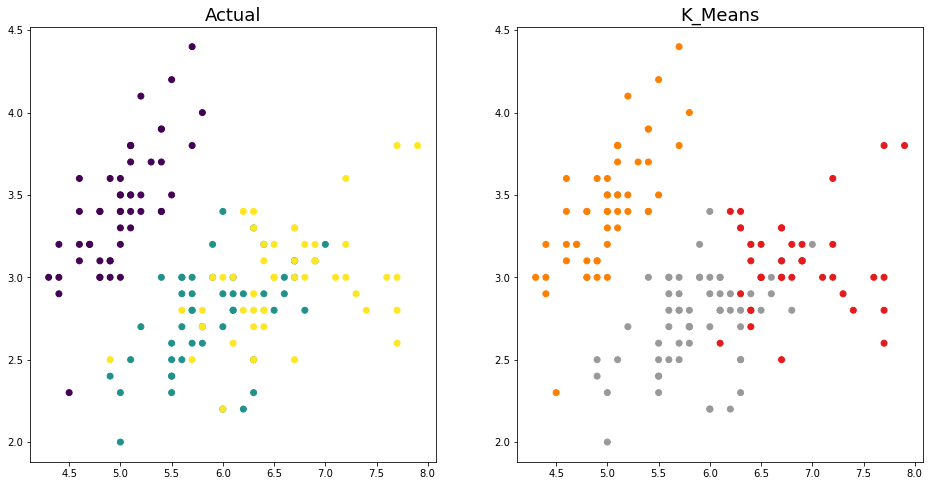

In [9]:
#Comparing the predicted and actual grouping

data['k_means'] = kmeans.predict(x)
data['target'] = iris['target']
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(data['sepal length (cm)'], data['sepal width (cm)'], c = data['target'])
axes[1].scatter(data['sepal length (cm)'], data['sepal width (cm)'], c = data['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

Given the number of clusters, it is easy to see that the K-means does a really good job defining the clusters of the dataset.

### Model evaluation

In [10]:
sm.accuracy_score(data['k_means'], data['target'])

0.09333333333333334

In [11]:
sm.confusion_matrix(data['k_means'], data['target'])

array([[ 0,  2, 36],
       [50,  0,  0],
       [ 0, 48, 14]], dtype=int64)

In a confusion matrix, the predicted class labels (0, 1, 2) are written along the top (column names). The true class labels (Iris-setosa, etc.) are written along the right side. Each cell in the matrix is a count of how many instances of a true class where classified as each of the predicted classes.